In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
cloud_df = pd.read_csv("output_metrics_cloud.csv")
edge_df = pd.read_csv("output_metrics_edge.csv")
hybrid_df = pd.read_csv("output_metrics_hybrid.csv")
sw_df = pd.read_csv("output_metrics_oblique.csv")

In [3]:
cloud_df[cloud_df['status_code'] == 200]['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    56.024937
0.96    59.336339
0.97    63.161782
0.98    71.609247
0.99    98.620524
Name: latency, dtype: float64

In [9]:
offload_latencies = cloud_df[cloud_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [11]:
edge_df[edge_df['status_code'] == 200]['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    223.207901
0.96    241.509265
0.97    256.732067
0.98    270.146259
0.99    285.355144
Name: latency, dtype: float64

In [12]:
local_latencies=edge_df[edge_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [6]:
hybrid_df[hybrid_df['status_code'] == 200]['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    103.600787
0.96    125.515259
0.97    150.179926
0.98    189.358323
0.99    221.499705
Name: latency, dtype: float64

In [14]:
local_offload_latencies=hybrid_df[hybrid_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [15]:
sw_df[sw_df['status_code'] == 200]['latency'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95     39.242287
0.96     47.885591
0.97     74.357453
0.98    132.098537
0.99    199.709997
Name: latency, dtype: float64

In [18]:
scalewave_latencies=sw_df[sw_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

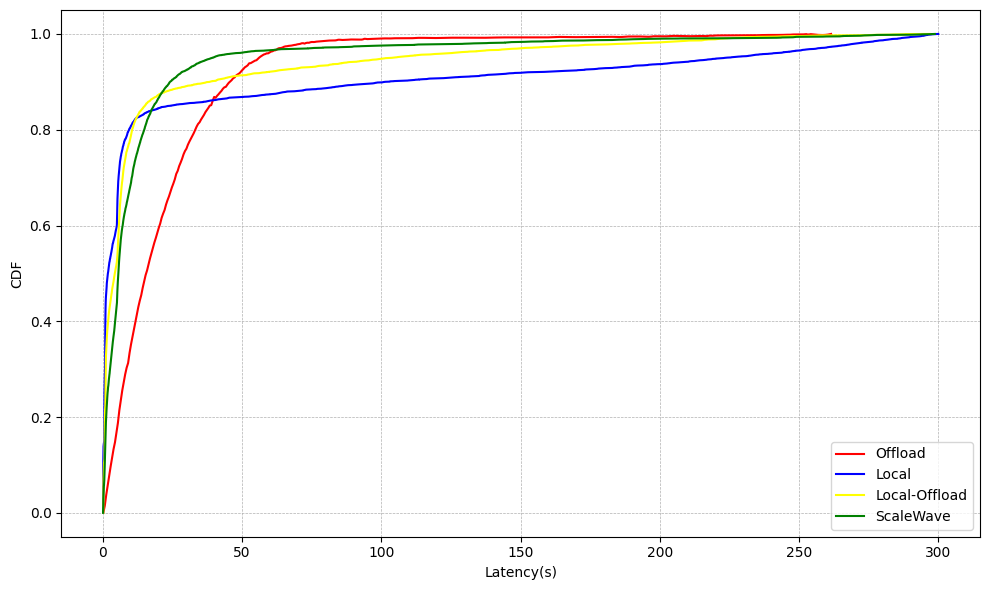

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define resources to plot
resources = [
    'latency'
]

# Define labels for the deployments
labels = ['Offload', 'Local', 'Local-Offload', 'ScaleWave']

# Define updated colors for the lines, including green for Cloud
# updated_colors = ['#00FF00', '#FF69B4', '#FFA500', '#87CEEB']  # Green, HotPink, Orange, SkyBlue
updated_colors = ['red', 'blue', 'yellow', 'green']

# Function to plot smooth CDF with custom colors and grid
def plot_smooth_cdf(data, labels, resource_name, colors):
    plt.figure(figsize=(10, 6))
    for df, label, color in zip(data, labels, colors):
        # Calculate CDF
        # values = np.sort(df[resource_name])
        values = np.sort(df[df['status_code'] == 200]['latency'])
        cdf = np.arange(1, len(values) + 1) / len(values)
        
        # Make the curve smooth
        try:
            spline = make_interp_spline(values, cdf)
            smooth_values = np.linspace(values.min(), values.max(), 500)
            smooth_cdf = spline(smooth_values)
            plt.plot(smooth_values, smooth_cdf, label=label, color=color)
        except Exception as e:
            # In case of an error with interpolation, plot the original CDF
            plt.plot(values, cdf, label=label, color=color)
    
    # plt.title(f'CDF of {resource_name}')
    plt.xlabel('Latency(s)')
    plt.ylabel('CDF')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    fig_name = "c18_success_latency_cdf"
    plt.savefig(f'{fig_name}.png')
    plt.show()

# Plot smooth CDF for each resource with updated colors
for resource in resources:
    data = [cloud_df, edge_df, hybrid_df, sw_df]
    plot_smooth_cdf(data, labels, resource, updated_colors)

In [21]:
offload_latencies = cloud_df[cloud_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [22]:
local_latencies=edge_df[edge_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [23]:
local_offload_latencies=hybrid_df[hybrid_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [24]:
scalewave_latencies=sw_df[sw_df['status_code'] == 200]['latency'].describe(percentiles=[.25, .50, .75, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

In [25]:
offload_latencies.to_csv("offload_latencies_c18.csv", index=False)
local_latencies.to_csv("local_latencies_c18.csv", index=False)
local_offload_latencies.to_csv("local_offload_latencies_c18.csv", index=False)
scalewave_latencies.to_csv("scalewave_latencies_c18.csv", index=False)

count    6757.000000
mean       21.661790
std        24.238877
min         0.202234
25%         6.853219
50%        15.560509
75%        29.119386
90%        45.666588
91%        47.351492
92%        49.410133
93%        50.972633
94%        53.397290
95%        56.024937
96%        59.336339
97%        63.161782
98%        71.609247
99%        98.620524
max       261.454327
Name: latency, dtype: float64

In [36]:
cloud_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       35.158016
std        64.939951
min         0.028831
50%        13.960714
85%        43.993306
90%        57.405138
91%        62.752933
92%        73.199180
93%       160.164804
94%       263.759539
95%       268.381240
96%       268.544478
97%       268.677640
98%       268.812527
99%       268.942144
max       269.069505
Name: latency, dtype: float64

In [37]:
edge_df['latency'].describe(percentiles=[.85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       87.112498
std       123.828084
min         0.023500
50%         6.440688
85%       300.012226
90%       300.013305
91%       300.013553
92%       300.013886
93%       300.014212
94%       300.014624
95%       300.014984
96%       300.015509
97%       300.016298
98%       300.018074
99%       300.022372
max       300.109781
Name: latency, dtype: float64

In [38]:
hybrid_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       55.619007
std       100.167541
min         0.068988
50%         6.285147
80%        79.460218
85%       172.031707
90%       300.011000
91%       300.011471
92%       300.011995
93%       300.012354
94%       300.012810
95%       300.013290
96%       300.013960
97%       300.014801
98%       300.016505
99%       300.022252
max       326.782956
Name: latency, dtype: float64

In [39]:
sw_df['latency'].describe(percentiles=[.8, .85, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99])

count    8846.000000
mean       17.667276
std        43.692834
min         0.016615
50%         5.297050
80%        16.146564
85%        22.284399
90%        37.390419
91%        41.119042
92%        41.469674
93%        45.823929
94%        55.135681
95%        55.643801
96%        91.934719
97%       142.921363
98%       195.028288
99%       299.424359
max       301.205605
Name: latency, dtype: float64